## 1 Data Preprocessing & Cleaning

In [5]:
# Import the needed libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 1. Load the Heart Disease UCI dataset into a Pandas DataFrame. 
df = pd.read_csv('../data/heart_disease.csv')

print('\nDataFrame info:')
df.info()

print(f'\nSummary Statistics: \n: {df.describe()}')
df.dropna()
X = df.drop('target', axis=1)
y = df['target']


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Summary Statistics: 
:                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.6956

In [24]:
# 2. Handle missing values (imputation or removal). 
# Inspecting the missing values
df.isnull().sum()

# Create a condition to collect the indices of the null values

null_rows = X.isnull().any(axis=1)

row_indices = X[null_rows].index.tolist()

In [25]:
# Removing the missing data rows from the data frame
df_dropped = df.dropna()
df_dropped

# Creating a new targeted DataFrame 
y_dropped = y.drop(row_indices)
y_dropped

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [26]:
# Sex will be the categorical variable that will be encoded
# Create Dummy Variable for just the sex Column 
df_encoded = pd.get_dummies(df_dropped, columns=['sex', 'cp', 'restecg', 'slope', 'fbs','exang','thal'])
df_encoded

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_0,sex_1,cp_0,...,slope_1,slope_2,fbs_0,fbs_1,exang_0,exang_1,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,2,0,False,True,True,...,False,True,True,False,True,False,False,False,False,True
1,53,140,203,155,3.1,0,0,False,True,True,...,False,False,False,True,False,True,False,False,False,True
2,70,145,174,125,2.6,0,0,False,True,True,...,False,False,True,False,False,True,False,False,False,True
3,61,148,203,161,0.0,1,0,False,True,True,...,False,True,True,False,True,False,False,False,False,True
4,62,138,294,106,1.9,3,0,True,False,True,...,True,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0,1,False,True,False,...,False,True,True,False,False,True,False,False,True,False
1021,60,125,258,141,2.8,1,0,False,True,True,...,True,False,True,False,False,True,False,False,False,True
1022,47,110,275,118,1.0,1,0,False,True,True,...,True,False,True,False,False,True,False,False,True,False
1023,50,110,254,159,0.0,0,1,True,False,True,...,False,True,True,False,True,False,False,False,True,False


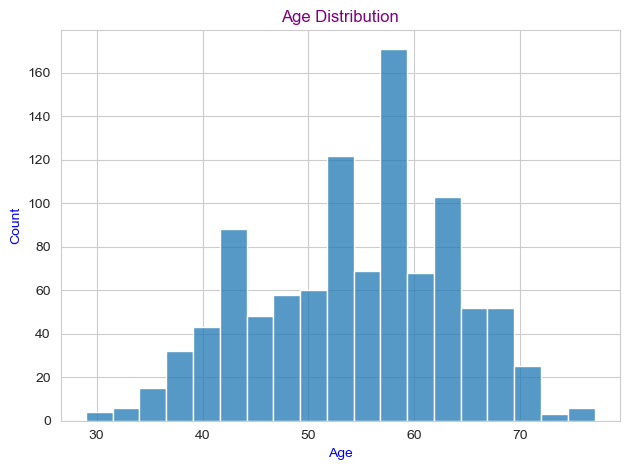

In [27]:
# 5. Conduct Exploratory Data Analysis (EDA) 
# plot a Histogram to see the age range of the data set 

sns.histplot(df_encoded['age'])
plt.title('Age Distribution', color='purple' )
plt.xlabel('Age', color='blue')
plt.ylabel('Count', color='blue')
plt.tight_layout()
plt.grid(True)
plt.show()

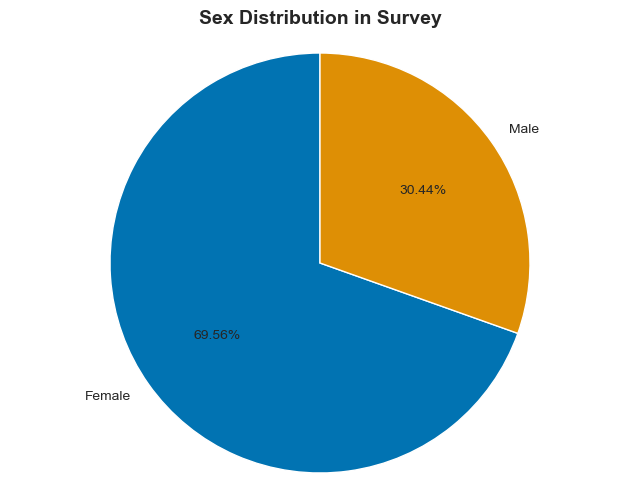

In [28]:
# Create a Pie Chart plot to see the Sex Distribution of the survey
# Count the values
value_counts = df_dropped['sex'].value_counts()

plt.figure(figsize=(8, 6))  # Slightly larger for better readability
sns.set_style('whitegrid')

# Creating the Pie Chart 
plt.pie(value_counts.values, 
        labels=['Female','Male'],  # Use actual labels from data
        autopct='%1.2f%%',  # Correct percentage format
        colors=sns.color_palette("colorblind", len(value_counts)),  
        startangle=90,  # Start from top
        )  

plt.title('Sex Distribution in Survey', fontsize=14, fontweight='bold')
plt.axis('equal')  # Ensure circular pie
plt.show()

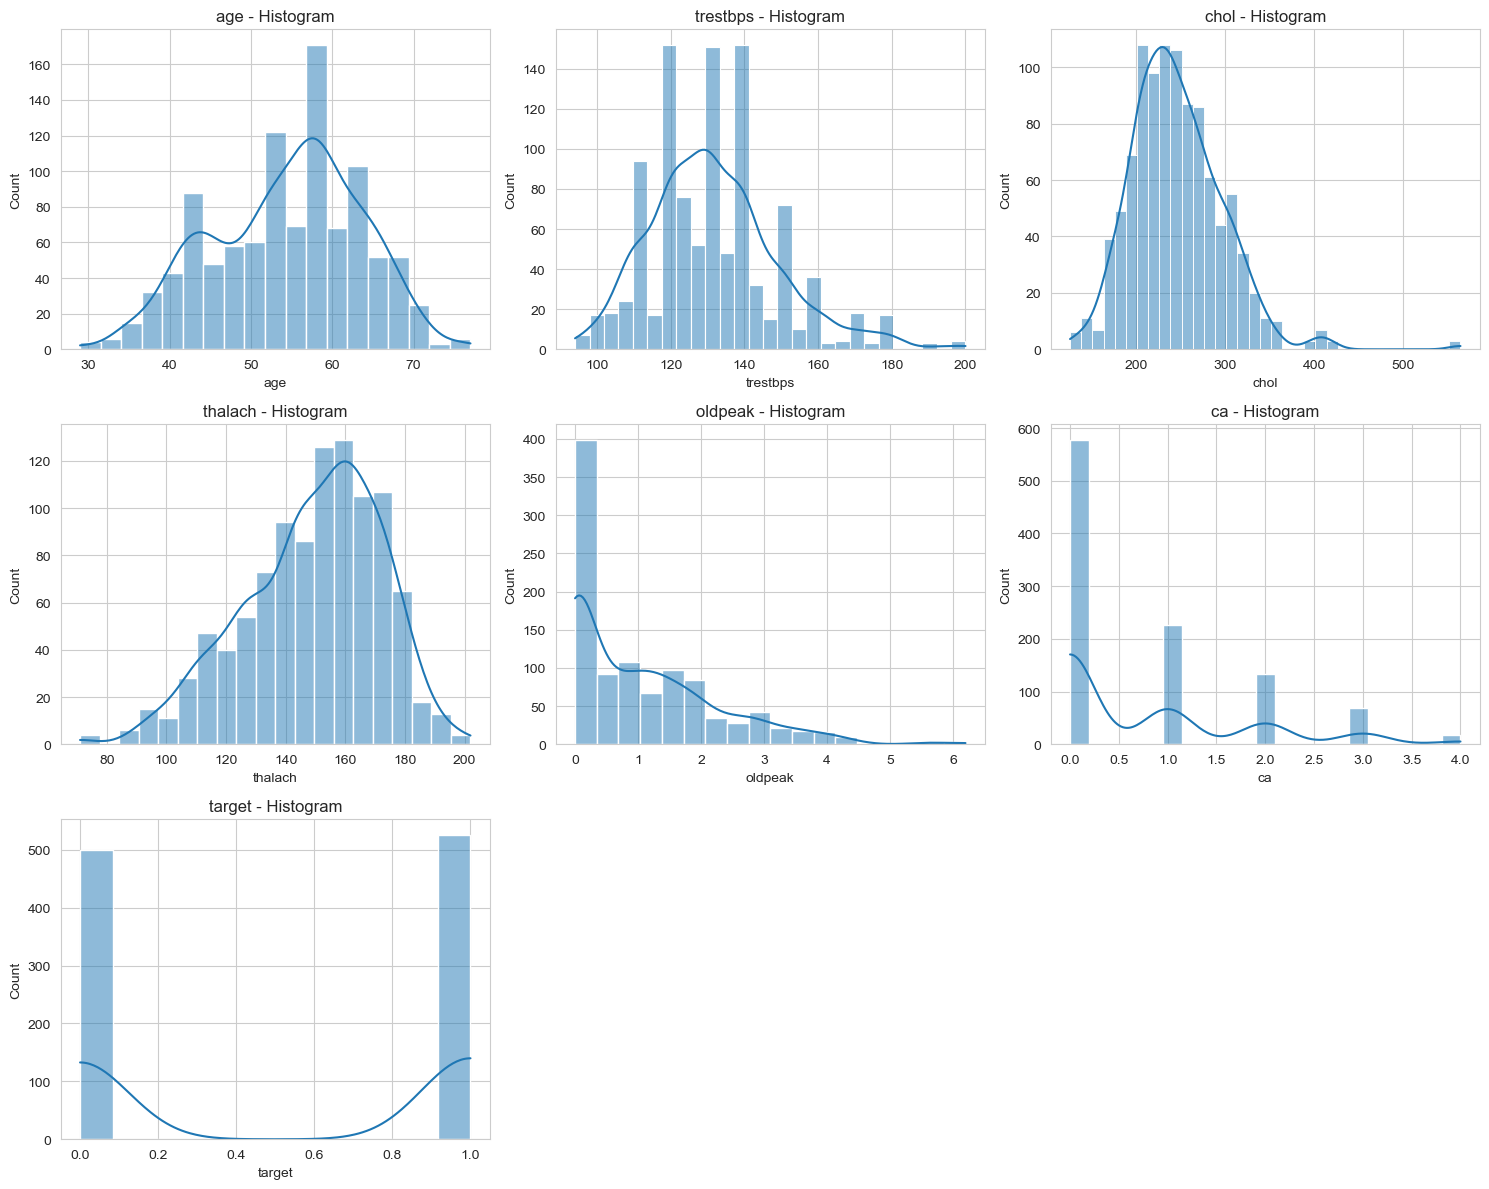

In [29]:

# Plot histograms for each numerical feature
numerical_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df_encoded[feature], kde=True)  
    plt.title(f'{feature} - Histogram')

plt.tight_layout()
plt.show()

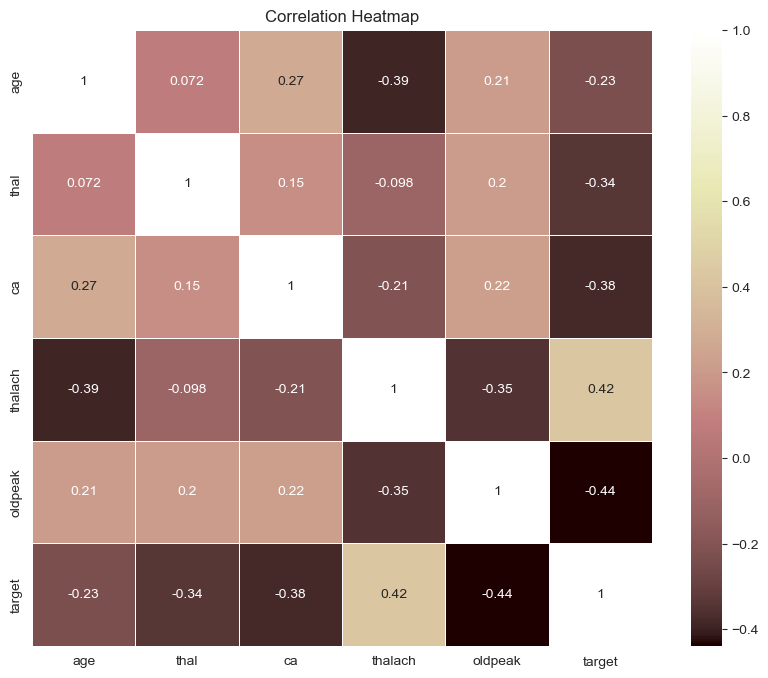

In [38]:
# Calculate the correlation matrix
correlation_matrix = df_dropped[['age', 'thal', 'ca', 'thalach', 'oldpeak', 'target']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='pink', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [33]:
# Standardize numerical features using StandardScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

numerical_features = df_encoded.select_dtypes(include=['int64', 'float64'])

X_train, X_test, y_train, y_test = train_test_split(numerical_features, y_dropped, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_tets_scaled = scaler.transform(X_test)

print(f'Dataset Shape: {df_encoded.shape}')
print(f'Number of classes: {len(np.unique(y_dropped))}')



Dataset Shape: (1025, 27)
Number of classes: 2


In [37]:
# Save the cleaned Dataframe into Csv file for later use:

df_encoded.drop('target', axis=1).to_csv('cleaned_X.csv', index=False )
y_dropped.to_csv('clean_y.csv', index=False)